# Take Home Quiz 1

---

This homework should be submitted **by LT** on ALICE.

## Libraries

---

Do <b>NOT</b> import any other libraries aside from those below.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

## Part 1. Combinations of Functions

---

For a more detailed discussion on combinations of functions, see [`Paul's Online Notes`](http://tutorial.math.lamar.edu/Classes/Alg/CombineFunctions.aspx).

Let the following: 

- $f(x) = \sin(2\pi x)$ 


- $g(x) = \cos\left(\frac{x}{\pi}\right)$

### Preliminaries

---

#### Q. Create a numpy array (called `x`) of 1000 equally spaced numbers from -25 to 25.

In [30]:
x = np.linspace(-25, 25, 1000)

#### Q. Create two functions called `f(x)` and `g(x)` as defined above.

In [31]:
def f(x):
    return np.sin(2 * np.pi * x)

def g(x):
    return np.cos(x / np.pi)

#### Q. Plot both graphs of `f(x)` and `g(x)` simulteneously (i.e. on the same plot) as a <b><u>solid blue line</u></b> and <b><u>solid red line</u></b>, respectively.

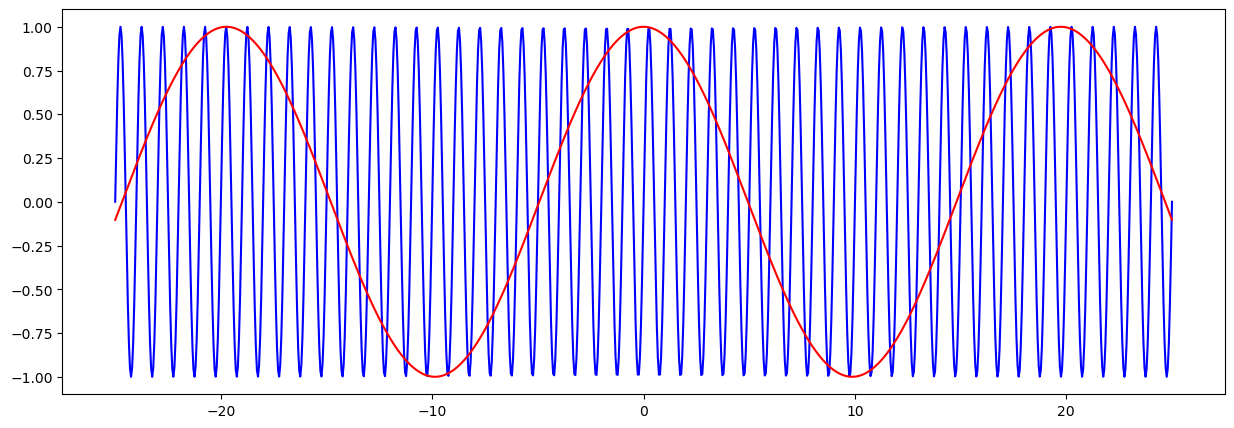

In [32]:
plt.plot(x, f(x), 'b-')
plt.plot(x, g(x), 'r-')
plt.show()

#### Q. Based on the resulting plot above, describe the differences between the two functions. Answer in 1 to 2 sentences.

Based on the resulting plot above, f(x) has a much higher frequency (shorter period) compared to g(x), which oscillates very slowly across the given range. Additionally, f(x) is a sine wave starting at the origin, while g(x) is a cosine wave starting at its peak.

### Sums of Functions

---

#### Q. Plot a graph of $f(x) + g(x)$ as a <b><u>solid blue line</u></b>.

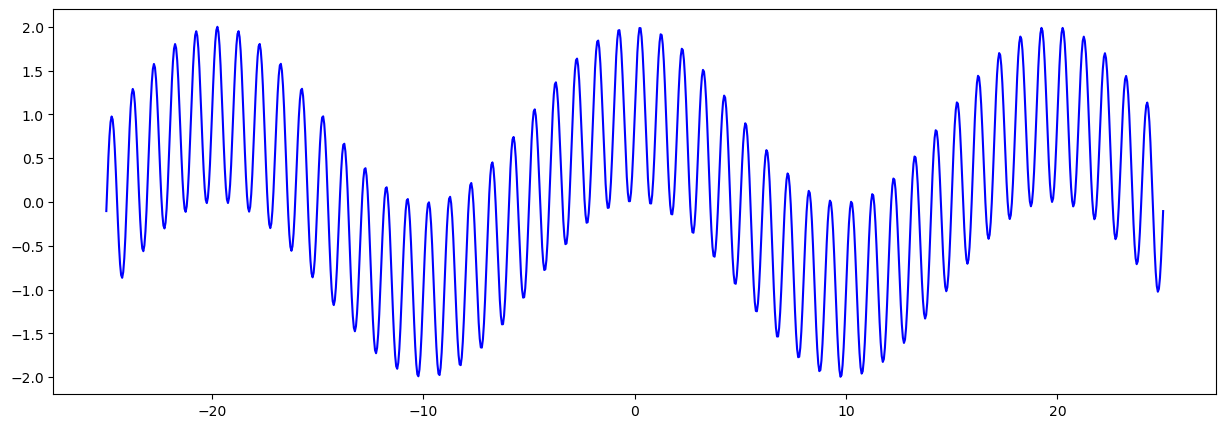

In [33]:
plt.plot(x, f(x) + g(x), 'b-')
plt.show()

#### Q. Describe how the two sinusoids interact when you add them. Answer in 1 to 2 sentences.

When added, the high-frequency oscillations of f(x) are superimposed onto the slow-moving curve of g(x). This causes the "center" or baseline of the fast sine wave to follow the shape of the slower cosine wave.

### Products of Functions

---

#### Q. Plot a graph of $f(x)g(x)$ as a <b><u>solid red line</u></b>. (1 pt.)

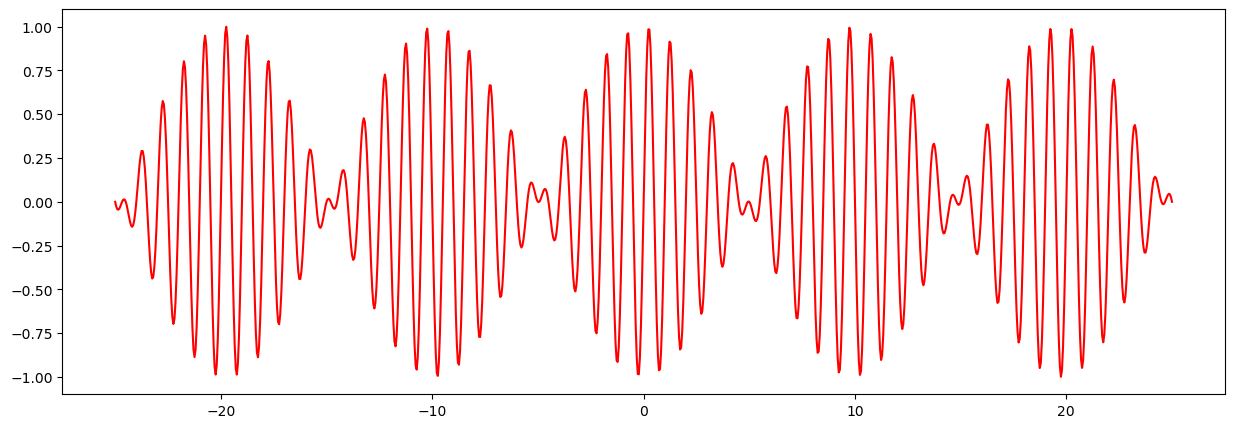

In [34]:
plt.plot(x, f(x) * g(x), 'r-')
plt.show()

#### Q. Describe how the two sinusoids interact when you multiply them. Answer in 1 to 2 sentences.

Multiplication results in amplitude modulation, where the slower function g(x) acts as an "envelope" for the faster function f(x). The height of the fast oscillations shrinks toward zero whenever g(x) approaches its x-intercepts.

### Composite Functions

---

#### Q. Plot a graph of $f(g(x))$ as a <b><u>solid green line</u></b>.

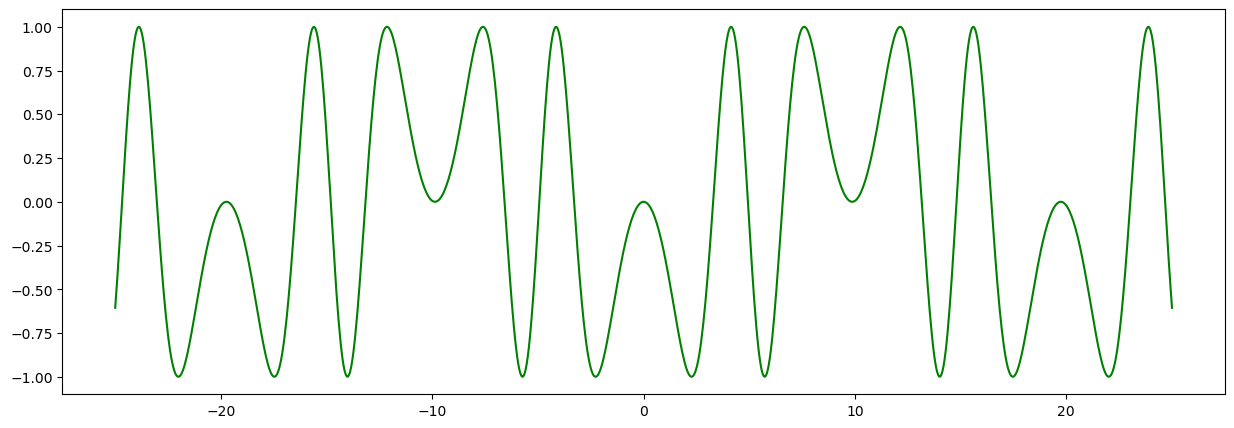

In [35]:
plt.plot(x, f(g(x)), 'g-')
plt.show()

#### Q. Describe how the two sinusoids interact they are composited in 1 to 2 sentences.

In the composition f(g(x)), the output of g(x) becomes the input for f(x); since g(x) only ranges between -1 and 1, f(x) only "sees" a small portion of its domain, resulting in a periodic wave with a varying local frequency.

### An Additive Model with Trend

---

#### Q. Plot all three graphs simulteneously as <b><u>dashed lines</u></b> (keep the colors specified above).

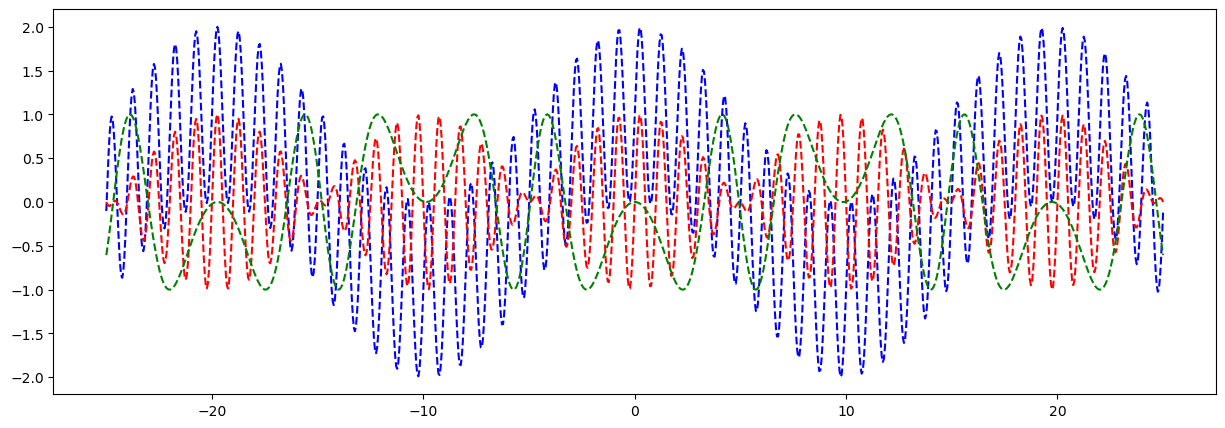

In [36]:
plt.plot(x, f(x)+g(x), 'b--')
plt.plot(x, f(x)*g(x), 'r--')
plt.plot(x, f(g(x)), 'g--')
plt.show()

#### Q. Let's try adding a positive linear trend. Plot a graph of $f(x) + g(x) + \frac{1}{8}x$ as a <b><u>solid green line</u></b>.

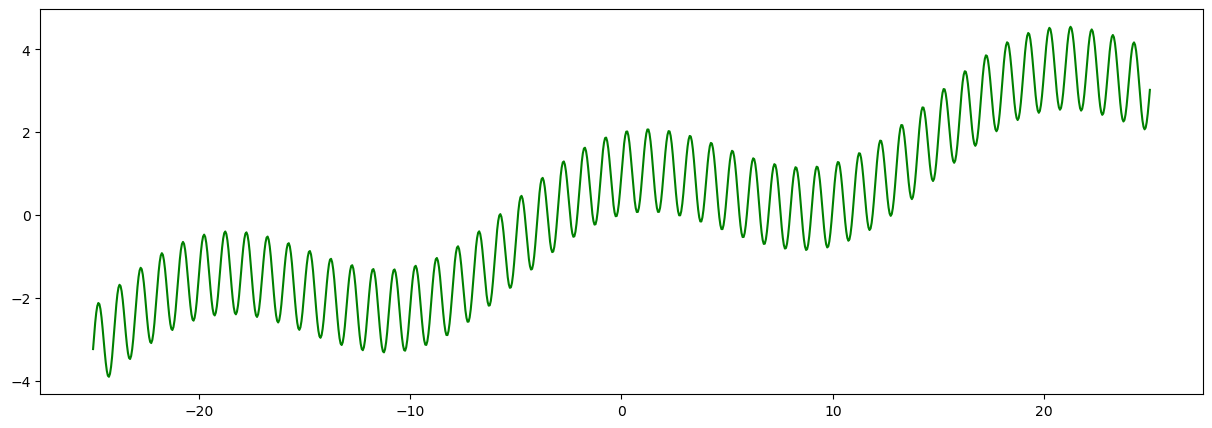

In [37]:
plt.plot(x, f(x) + g(x) + 1 / 8 * x, 'g-')
plt.show()

#### Q. What kinds of data could reasonably follow the function described above? Answer in 2 to 3 sentences.

This function models data with multiple seasonalities and a long-term trend, such as daily electricity demand over a year or stock market prices with cyclic fluctuations. The sinusoids capture short-term and long-term cycles, while the $\frac{1}{8}x$ term represents a steady upward growth over time.

## Part 2. Curve Fitting

---

For this sections, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

### `fit_data1.csv`

---

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [38]:
fit_data1 = pd.read_csv('fit_data1.csv')
fit_data1

,x,y
0,0.000000,292.073549
1,0.707071,214.164335
2,1.414141,230.606929
3,2.121212,303.335048
4,2.828283,251.714122
...,...,...
95,67.171717,428.026119
96,67.878788,397.565071
97,68.585859,337.196256
98,69.292929,403.412667


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [39]:
x, y = fit_data1[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

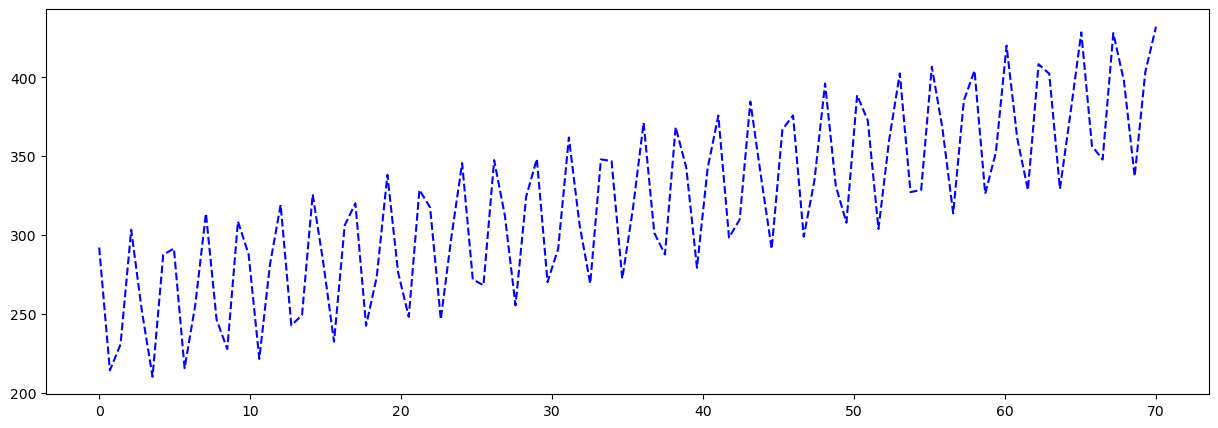

In [40]:
plt.plot(x, y, 'b--')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [41]:
def fit1(x, A, B, f, m, a):
    """Sinusoid + Line"""
    return a * np.sin(2 * np.pi * f * x + A) + m * x + B

popt, pcov = curve_fit(fit1, x, y)


SSR= np.sum((y - fit1(x, *popt)) ** 2)

print(f"Phase (A) = {popt[0]:.2f}")
print(f"Intercept (B) = {popt[1]:.2f}")
print(f"Frequency (f) = {popt[2]:.2f}")
print(f"Slope (m) = {popt[3]:.2f}")
print(f"Amplitude (a) = {popt[4]:.2f}")
print(f"SSR = {SSR:.2f}")

Phase (A) = 1.00
Intercept (B) = 250.00
Frequency (f) = 1.00
Slope (m) = 2.00
Amplitude (a) = 50.00
SSR = 0.00


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

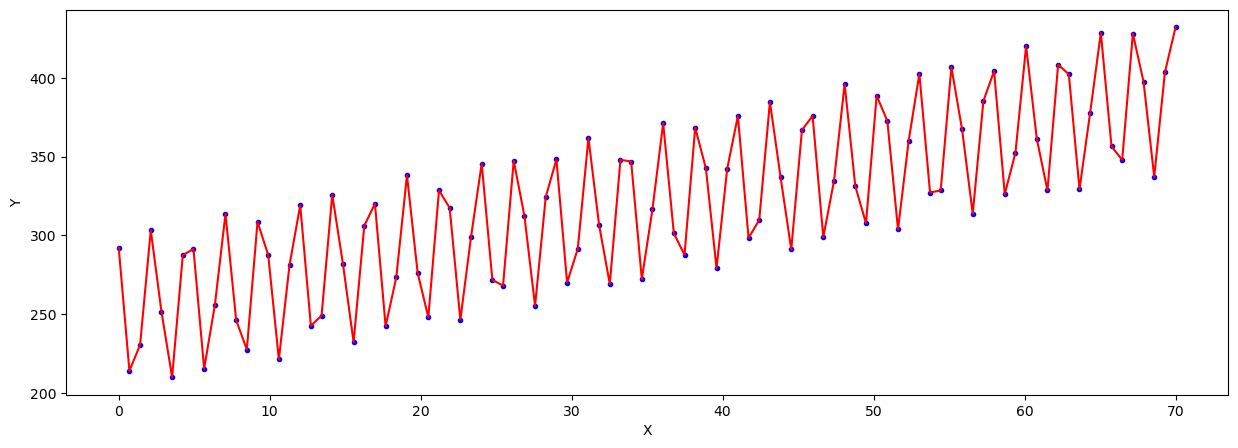

In [42]:
plt.plot(x, y, 'b.')
plt.plot(x, fit1(x, *popt), 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### `fit_data2.csv`

---

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [43]:
fit_data2 = pd.read_csv('fit_data2.csv')
fit_data2

,x,y
0,0.000000,0.000000
1,0.008008,0.007944
2,0.016016,0.015762
3,0.024024,0.023454
4,0.032032,0.031022
...,...,...
995,7.967968,0.002760
996,7.975976,0.002741
997,7.983984,0.002722
998,7.991992,0.002703


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [44]:
x, y = fit_data2[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

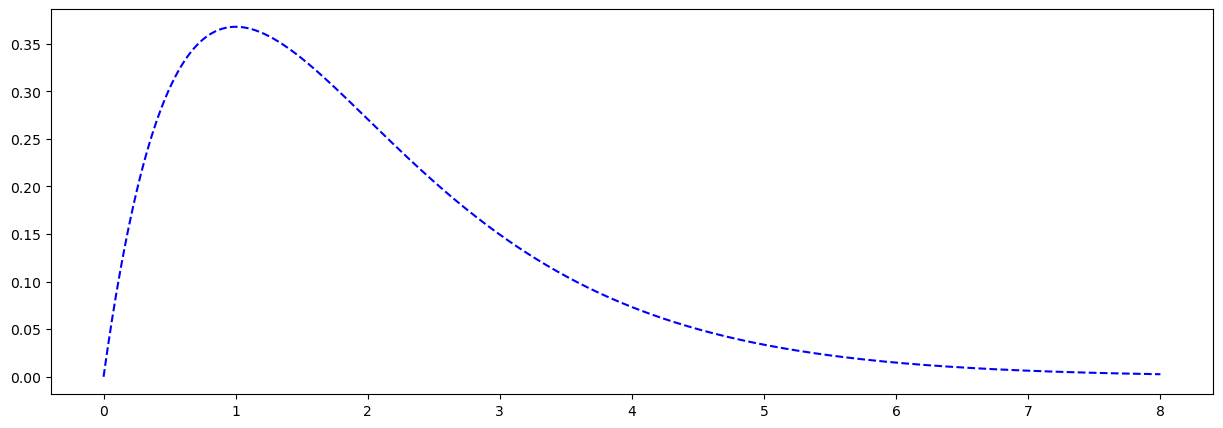

In [45]:
plt.plot(x, y, 'b--')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [46]:
def fit2(x, a, b, c, decay_rate):
    """Quadratic + Exponential"""
    return (a * x ** 2 + b * x + c) * np.exp(-decay_rate * x)

popt, pcov = curve_fit(fit2, x, y)

SSR = np.sum((y - fit2(x, *popt))**2)


print(f"Coefficient A = {popt[0]: .2f}")
print(f"Coefficient B = {popt[1]: .2f}")
print(f"Coefficient C = {popt[2]: .2f}")
print(f"Decay Rate (alpha) = {popt[3]: .2f}")
print(f"SSR = {SSR: .2f}")

Coefficient A = -0.00
Coefficient B =  1.00
Coefficient C = -0.00
Decay Rate (alpha) =  1.00
SSR =  0.00


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

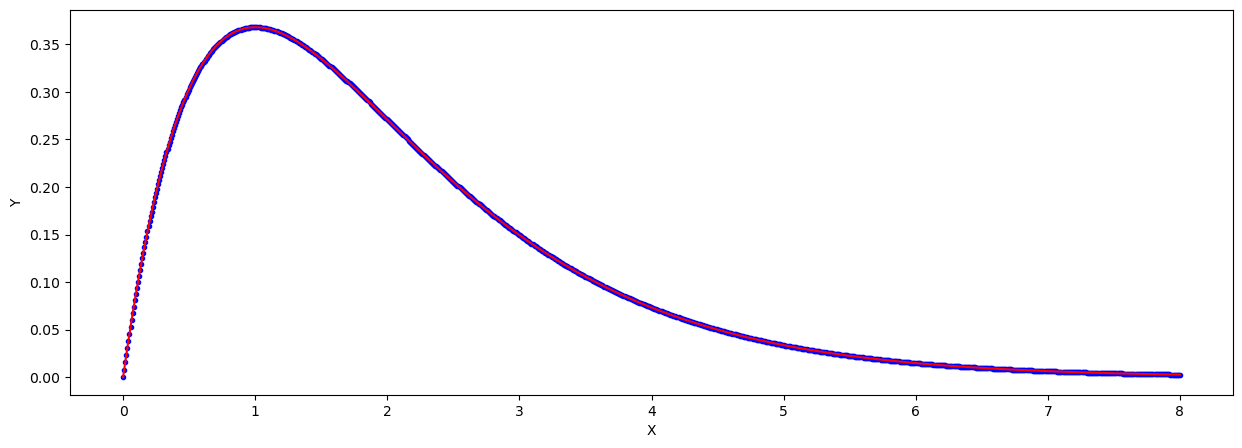

In [47]:
plt.plot(x, y, 'b.')
plt.plot(x, fit2(x, *popt), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### `fit_data3.csv`

---

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [48]:
fit_data3 = pd.read_csv('fit_data3.csv')
fit_data3

,x,y
0,-12.566371,1.000000
1,-12.312505,0.470743
2,-12.058638,0.232564
3,-11.804772,0.126156
4,-11.550906,0.078146
...,...,...
95,11.550906,12.796559
96,11.804772,7.926702
97,12.058638,4.299893
98,12.312505,2.124303


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [49]:
x, y = fit_data3[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots) 

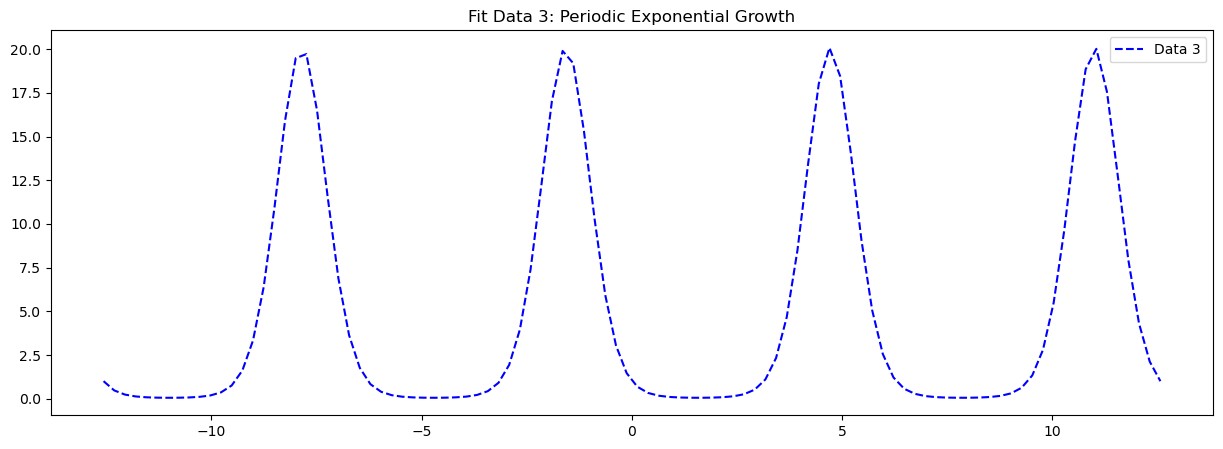

In [50]:
plt.plot(x, y, 'b--', label='Data 3') #Added label, title, and legend
plt.title('Fit Data 3: Periodic Exponential Growth') 
plt.legend()
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [51]:
def fit3(x, a, f, A, B, C):
    """Exponential Sinusoid Model"""
    return A * np.exp(a * np.sin(f * x + B) + C)

#Added p0 (initial guesses) for better stability 
p0 = [3, 0.25, 1, 0, 0]
popt, pcov = curve_fit(fit3, x, y, p0=p0)

SSR = np.sum((y - fit3(x, *popt)) ** 2)

#Print parameters
print(f"Amplitude (a) = {popt[0]:.2f}")
print(f"Frequency (f) = {popt[1]:.2f}")
print(f"Scale Factor (A) = {popt[2]:.2f}")
print(f"Phase Shift (B) = {popt[3]:.2f}")
print(f"Offset (C) = {popt[4]:.2f}")
print(f"SSR = {SSR:.2e}") #Use scientific notation for very small SSR

Amplitude (a) = 0.34
Frequency (f) = 0.27
Scale Factor (A) = 254.03
Phase Shift (B) = 0.01
Offset (C) = -251.22
SSR = 6.66e+03


/var/folders/3t/1qmznh8910ncrjkp9r4mbbnw0000gn/T/ipykernel_90809/3824129702.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit3, x, y, p0=p0)


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

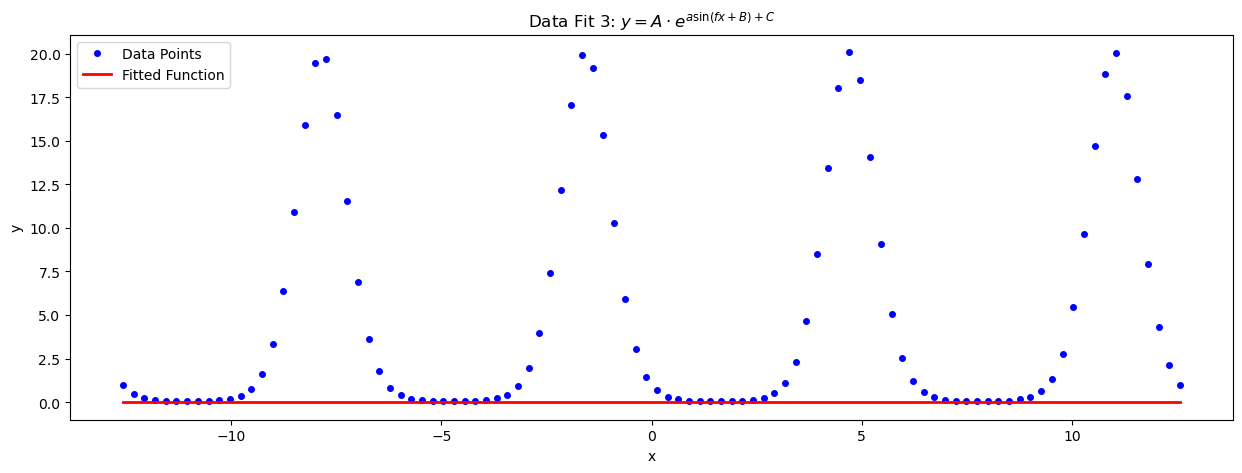

In [52]:
x_smooth = np.linspace(x.min(), x.max(), 1000) #Dense x for smoothness
y_smooth = fit3(x_smooth, *popt)

plt.plot(x, y, 'bo', label='Data Points', markersize=4) #'bo' for blue dots
plt.plot(x_smooth, y_smooth, 'r-', label='Fitted Function', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')

#Using a raw string (r) for the title to avoid Syntax Warnings 
plt.title(r'Data Fit 3: $y = A \cdot e^{a \sin(fx + B) + C}$')
plt.legend()
plt.show()

### `fit_data4.csv`

---

#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [53]:
fit_data4 = pd.read_csv('fit_data4.csv')
fit_data4

,x,y
0,-5.00000,0.010799
1,-4.89899,0.005704
2,-4.79798,0.006033
3,-4.69697,0.059341
4,-4.59596,0.020562
...,...,...
95,4.59596,1.071575
96,4.69697,1.034006
97,4.79798,1.015753
98,4.89899,0.989731


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [54]:
x, y = fit_data4[['x', 'y']].to_numpy().T

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

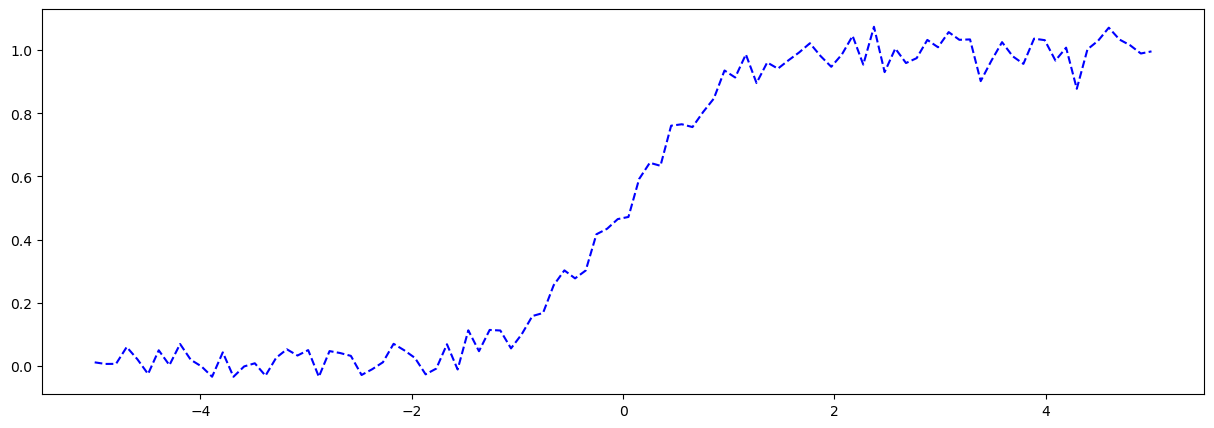

In [55]:
plt.plot(x, y, 'b--')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [56]:
def fit4(x, A, k, x0):
    """Logistic Function"""
    return A / (1 + np.exp(-x0 * (x - k)))

popt, pcov = curve_fit(fit4, x, y)

SSR = np.sum((y - fit4(x, *popt)) ** 2)

print(f"Max Value (A) = {popt[0]:.2f}")
print(f"Midpoint (k) = {popt[1]:.2f}")
print(f"Growth Rate (x0) = {popt[2]:.2f}")
print(f"SSR = {SSR:.2f}")

Max Value (A) = 1.00
Midpoint (k) = -0.01
Growth Rate (x0) = 2.02
SSR = 0.15


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

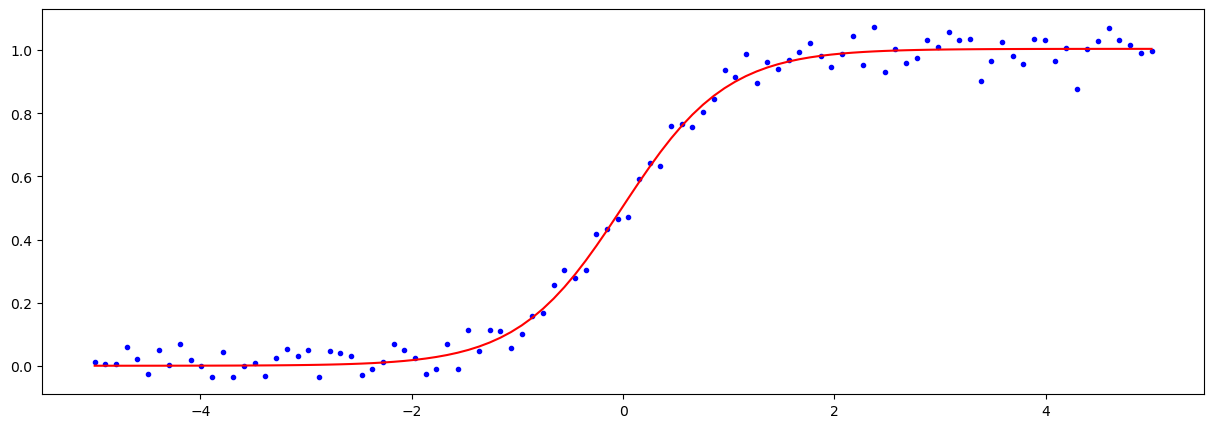

In [57]:
plt.plot(x, y, 'b.')
plt.plot(x, fit4(x, *popt), 'r-')
plt.show()